In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='0173f8a1-9364-4a93-85fd-5a49de9c53f1', project_access_token='p-8c8d4ebd62e185973357f8daf6fe46662979370c')
pc = project.project_context


# 1. Set up the environment

Before running the code in this notebook, please make sure you have the following requirements:

A Watson Machine Learning (WML) Service instance (a free plan is offered and information about how to create an instance can be found here)

1. Local python environment configurations:
- Python 3.5
- xgboost
- watson-machine-learning-client
- pixiedust
- matplotlib
- seaborn

2. Download the Grape leaves dataset.

# 2. Load and explore the data

In this section, we will load the data into a pandas dataframe and perform an exploratory data analysis (EDA).


In [2]:
!rm -Rf datasetWS_DvsEvsHvsM_512-512_git

In [3]:
!git clone https://github.com/RenataUjhaziova/datasetWS_DvsEvsHvsM_512-512_git.git

Cloning into 'datasetWS_DvsEvsHvsM_512-512_git'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (290/290), done.
remote: Total 292 (delta 0), reused 289 (delta 0), pack-reused 0
Receiving objects: 100% (292/292), 49.26 MiB | 46.91 MiB/s, done.


In [4]:
!ls

datasetWS_DvsEvsHvsM_512-512_git


In [5]:
%cd ./datasetWS_DvsEvsHvsM_512-512_git/

/home/dsxuser/work/datasetWS_DvsEvsHvsM_512-512_git


In [6]:
!pip install opencv-python 

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [7]:
# Get the data.
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# read images
def read_images(path):
    print('Reading from', path)
    files = [file for file in os.listdir(path)]
    image = cv2.imread(path+files[0])
    images = np.zeros(shape=(len(files), 512, 512, image.shape[2]))
    for i in range(len(files)):
        image = cv2.imread(path+files[i])
        images[i,:,:,:] = cv2.resize(image,(512,512))
    return images

In [9]:
healthy_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/healthy/')
esca_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/esca/')
dry_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/dry/')
mite_train = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/training_set/mite/')

Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/healthy/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/esca/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/dry/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/training_set/mite/


In [10]:
healthy_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/healthy/')
esca_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/esca/')
dry_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/dry/')
mite_test = read_images(path= '../datasetWS_DvsEvsHvsM_512-512_git/test_set/mite/')

Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/healthy/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/esca/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/dry/
Reading from ../datasetWS_DvsEvsHvsM_512-512_git/test_set/mite/


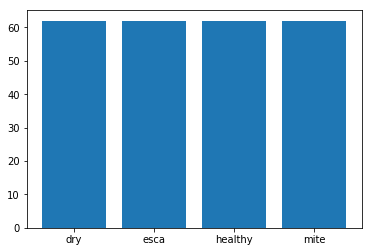

In [11]:
# record count in each classes
plt.figure(0)
plt.bar(['dry', 'esca', 'healthy', 'mite'],\
        [healthy_train.shape[0] + healthy_test.shape[0],
         esca_train.shape[0] + esca_test.shape[0], 
         dry_train.shape[0] + dry_test.shape[0], 
         mite_train.shape[0] + mite_test.shape[0]])
plt.show()

In [12]:
# create dataframe
import pandas as pd

In [13]:
data = pd.DataFrame(columns=['hist_data', 'label'])
def append_to_df(img_array, df, label):
    for image in img_array:
        hist_b = np.histogram(image[:,:,0], bins=30, density=True, range=(0,255))[0]
        hist_g = np.histogram(image[:,:,1], bins=30, density=True, range=(0,255))[0]
        hist_r = np.histogram(image[:,:,2], bins=30, density=True, range=(0,255))[0]
        hist = np.append(np.append(hist_r, hist_g), hist_b)
        df = df.append({'hist_data': hist, 'label': label}, ignore_index=True)
    return df

In [14]:
data = append_to_df(dry_train, data,0)
data = append_to_df(dry_test, data,0)
data = append_to_df(esca_train, data,1)
data = append_to_df(esca_test, data,1)
data = append_to_df(healthy_train, data,2)
data = append_to_df(healthy_test, data,2)
data = append_to_df(mite_train, data,3)
data = append_to_df(mite_test, data,3)

In [15]:
data.head(10)

,hist_data,label
0,"[4.48787913603e-07, 5.38545496324e-06, 0.00015...",0
1,"[0.000143163344439, 0.00142400404986, 0.002645...",0
2,"[4.48787913603e-07, 4.12884880515e-05, 0.00093...",0
3,"[3.14151539522e-06, 1.43612132353e-05, 0.00011...",0
4,"[0.000175027286305, 0.00113947251264, 0.002285...",0
5,"[4.48787913603e-06, 5.02642463235e-05, 0.00053...",0
6,"[1.34636374081e-06, 1.07709099265e-05, 0.00069...",0
7,"[8.07818244485e-06, 3.41078814338e-05, 0.00015...",0
8,"[8.52697035846e-06, 4.30836397059e-05, 0.00058...",0
9,"[0.0, 1.79515165441e-06, 2.3785759421e-05, 0.0...",0


In [16]:
# creating variables and labes
X = np.stack(data['hist_data'].values)
y = data['label'].values.astype(int)

In [17]:
# splitting the dataset into the Training and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

# List the number of records in each data set.
print('Number of training records: ' + str(len(X_train)))
print('Number of testing records : ' + str(len(X_test)))

Number of training records: 186
Number of testing records : 62


# 3. Train the model

In [18]:
# Import packages you need to create the XGBoost model.
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# Create the XGB classifier - xgb_model.
xgb_model = XGBClassifier(n_estimators=200, 
                          objective= 'multi:softmax')

In [20]:
# List the default parameters.
print(xgb_model.get_xgb_params())

{'missing': None, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'max_delta_step': 0, 'objective': 'multi:softmax', 'base_score': 0.5, 'learning_rate': 0.1, 'reg_lambda': 1, 'subsample': 1, 'n_estimators': 200, 'reg_alpha': 0, 'min_child_weight': 1, 'silent': 1, 'max_depth': 3, 'scale_pos_weight': 1, 'gamma': 0, 'seed': 0}


In [21]:
# Train and evaluate.
xgb_model.fit(X_train, y_train, eval_metric=['mlogloss'], 
              eval_set=[((X_train, y_train)),(X_test, y_test)])

[0]	validation_0-mlogloss:1.24189	validation_1-mlogloss:1.28666
[1]	validation_0-mlogloss:1.11657	validation_1-mlogloss:1.19932
[2]	validation_0-mlogloss:1.00868	validation_1-mlogloss:1.12259
[3]	validation_0-mlogloss:0.917018	validation_1-mlogloss:1.06072
[4]	validation_0-mlogloss:0.835359	validation_1-mlogloss:0.999907
[5]	validation_0-mlogloss:0.76351	validation_1-mlogloss:0.948516
[6]	validation_0-mlogloss:0.700604	validation_1-mlogloss:0.898613
[7]	validation_0-mlogloss:0.640666	validation_1-mlogloss:0.857841
[8]	validation_0-mlogloss:0.589405	validation_1-mlogloss:0.817956
[9]	validation_0-mlogloss:0.541673	validation_1-mlogloss:0.7821
[10]	validation_0-mlogloss:0.500344	validation_1-mlogloss:0.749752
[11]	validation_0-mlogloss:0.463164	validation_1-mlogloss:0.72781
[12]	validation_0-mlogloss:0.427563	validation_1-mlogloss:0.705393
[13]	validation_0-mlogloss:0.396146	validation_1-mlogloss:0.684758
[14]	validation_0-mlogloss:0.368055	validation_1-mlogloss:0.658013
[15]	validation_

[123]	validation_0-mlogloss:0.015376	validation_1-mlogloss:0.378843
[124]	validation_0-mlogloss:0.015295	validation_1-mlogloss:0.379033
[125]	validation_0-mlogloss:0.015215	validation_1-mlogloss:0.377761
[126]	validation_0-mlogloss:0.015127	validation_1-mlogloss:0.377488
[127]	validation_0-mlogloss:0.01505	validation_1-mlogloss:0.376706
[128]	validation_0-mlogloss:0.014969	validation_1-mlogloss:0.376913
[129]	validation_0-mlogloss:0.014895	validation_1-mlogloss:0.376888
[130]	validation_0-mlogloss:0.01482	validation_1-mlogloss:0.375671
[131]	validation_0-mlogloss:0.014766	validation_1-mlogloss:0.375771
[132]	validation_0-mlogloss:0.014683	validation_1-mlogloss:0.375269
[133]	validation_0-mlogloss:0.014631	validation_1-mlogloss:0.375341
[134]	validation_0-mlogloss:0.01456	validation_1-mlogloss:0.375557
[135]	validation_0-mlogloss:0.014492	validation_1-mlogloss:0.37467
[136]	validation_0-mlogloss:0.014441	validation_1-mlogloss:0.374754
[137]	validation_0-mlogloss:0.014375	validation_1-ml

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [22]:
# Plot and display the performance evaluation
xgb_eval = xgb_model.evals_result()
# eval_steps = range(len(xgb_eval['validation_0']['merror']))
eval_steps = range(len(xgb_eval['validation_0']['mlogloss']))

Text(0.5,0,'Number of iterations')

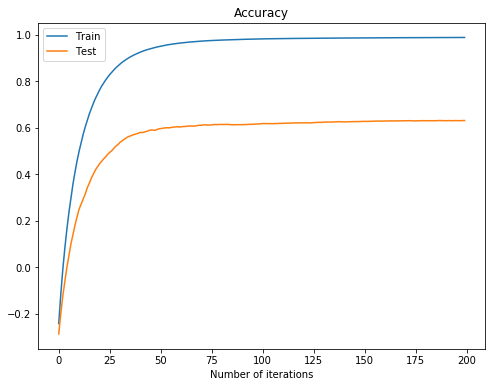

In [23]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps, [1-x for x in xgb_eval['validation_0']['mlogloss']], label='Train')
ax.plot(eval_steps, [1-x for x in xgb_eval['validation_1']['mlogloss']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations')

In [24]:
# Select trained model.
n_trees = 85
y_pred = xgb_model.predict(X_test, ntree_limit= n_trees)

In [25]:
# Check the accuracy of the trained model.
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 85.48%


Note: You will use the test data accuracy to compare the accuracy of the model with default parameters to the accuracy of the model with tuned parameters.

In [26]:
from sklearn.metrics import confusion_matrix

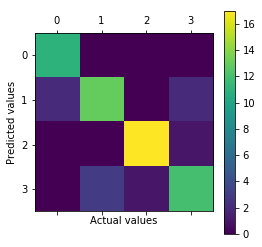

,0,1,2,3
0,11,0,0,0
1,2,13,0,2
2,0,0,17,1
3,0,3,1,12


In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.colorbar()
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()
pd.DataFrame(cm)

In [28]:
# prediction
y_pred_prob = xgb_model.predict_proba(X_test)
y_pred_prob

array([[  1.93020201e-03,   3.69880050e-02,   8.58483851e-01,
          1.02597959e-01],
       [  1.24701504e-02,   8.29893723e-03,   7.96203554e-01,
          1.83027357e-01],
       [  2.14108569e-03,   9.83320832e-01,   2.97778123e-03,
          1.15602752e-02],
       [  8.70375137e-04,   3.34930024e-04,   9.93185282e-01,
          5.60938893e-03],
       [  5.90513635e-04,   6.34565076e-04,   9.82738554e-01,
          1.60363633e-02],
       [  4.08312231e-02,   4.15034950e-01,   3.76170538e-02,
          5.06516755e-01],
       [  9.92611229e-01,   9.64583887e-04,   7.87644356e-04,
          5.63649973e-03],
       [  2.97568142e-02,   1.23521779e-02,   9.42629397e-01,
          1.52616352e-02],
       [  3.35009396e-02,   5.96696258e-01,   2.72058606e-01,
          9.77442041e-02],
       [  8.38246197e-03,   5.69616705e-02,   1.91588610e-01,
          7.43067265e-01],
       [  1.06594164e-03,   9.97611165e-01,   6.36938785e-04,
          6.85909996e-04],
       [  8.23399751e

## 3.1 Grid search and cross validation for model tuning

Use grid search and cross-validation to tune the model.

In [ ]:
# Create XGBoost pipeline, set up parameter grid.
xgb_model_gs = XGBClassifier()
parameters = {'reg_alpha': [0.0, 1.0, 2.0], 
              'reg_lambda': [0.0, 1.0, 2.0], 
              'n_estimators': [n_trees], 
              'seed': [1337]}            

In [ ]:
# Search for the best parameters.
clf = GridSearchCV(estimator = xgb_model_gs, 
                   param_grid = parameters, scoring='accuracy', 
                   cv=5, verbose=1, n_jobs=1, refit=True)
clf.fit(X_train, y_train)

In [ ]:
# View the performance result.
clf.grid_scores_

Display the accuracy estimated using cross-validation and the hyperparameter values for the best model.

In [ ]:
print('Best score: %.1f%%' % (clf.best_score_*100))
print('Best parameter set: %s' % (clf.best_params_))

In [ ]:
# Display the accuracy of the best parameter combination on the test set.
y_pred = clf.best_estimator_.predict(X_test, ntree_limit= n_trees)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

## 3.2 PCA for model tuning

Use PCA to tune the model.

In [35]:
# PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=10)
xgb_model_pca = XGBClassifier(n_estimators=n_trees)
pipeline = Pipeline(steps=[('pca', pca), ('xgb', xgb_model_pca)])

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('xgb', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=85, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

You are ready to evaluate the accuracy of the model trained on the reduced set of features.

In [38]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 88.71%


# 4. Persist the model

In this section, we will show how to use the watson-machine-learning-client package to store your XGBoost model in the WML repository.

In [39]:
!rm -rf $PIP_BUILD/watson-machine-learning-client

In [40]:
!pip install watson-machine-learning-client

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [41]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [42]:
wml_credentials={
    'url': 'https://us-south.ml.cloud.ibm.com',
    'access_key': '1i_a51p0p4pg-wRnOy3XdLwHrxzURhXz2_dERELy_RR-',
    'username': '68c5e0c2-16df-4265-9846-3c382fd66494',
    'password': 'b696c9e3-d790-41c6-900d-580a64f9ccbb',
    'instance_id': '985d7680-d220-4984-85e1-31cf24cd3369'
}

In [43]:
client = WatsonMachineLearningAPIClient(wml_credentials)

# 5. Save the XGBoost model in the WML Repository

Save the model artifact as XGBoost model for image recognition to WML instance.

In [44]:
model_props = {client.repository.ModelMetaNames.NAME: 'XGBoost model for grape leaves disease classification'}
pipeline_xgb_model = Pipeline(steps=[('xgb', xgb_model)])
model_details = client.repository.store_model(pipeline, model_props)

In [45]:
print(model_details)

{'entity': {'deployments': {'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/985d7680-d220-4984-85e1-31cf24cd3369/published_models/1fd4a6c8-f228-4c6a-badb-3ff5d259d6e0/deployments', 'count': 0}, 'feedback_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/985d7680-d220-4984-85e1-31cf24cd3369/published_models/1fd4a6c8-f228-4c6a-badb-3ff5d259d6e0/feedback', 'runtime_environment': 'python-3.5', 'learning_configuration_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/985d7680-d220-4984-85e1-31cf24cd3369/published_models/1fd4a6c8-f228-4c6a-badb-3ff5d259d6e0/learning_configuration', 'latest_version': {'url': 'https://us-south.ml.cloud.ibm.com/v3/ml_assets/models/1fd4a6c8-f228-4c6a-badb-3ff5d259d6e0/versions/79679a0b-7e59-4063-a145-ea2648726b46', 'created_at': '2019-07-14T20:32:37.233Z', 'guid': '79679a0b-7e59-4063-a145-ea2648726b46'}, 'model_type': 'scikit-learn-0.19', 'name': 'XGBoost model for grape leaves disease classification', 'learning_iterations_url': 'https

Get the saved model metadata from WML.

# 6. Deploy and score in the WML repository 

In this section, you will learn how to create online scoring and score a new data record in the WML repository.

You can list all stored models using the list_models method.

In [46]:
# Display a list of all the models.
client.repository.list_models()

------------------------------------  ------------------------------------------------------------  ------------------------  -----------------
GUID                                  NAME                                                          CREATED                   FRAMEWORK
1fd4a6c8-f228-4c6a-badb-3ff5d259d6e0  XGBoost model for grape leaves disease classification         2019-07-14T20:32:37.160Z  scikit-learn-0.19
a414a079-bbad-41ee-b7eb-5b070bba674b  KNN model for grape leaves disease classification             2019-07-09T11:37:56.141Z  scikit-learn-0.19
f79bb1c3-2ab2-46de-bf24-cf1cf74ccfd4  ANN cv model for grape leaves disease classification v1-1     2019-07-09T09:14:57.196Z  tensorflow-1.5
fc015b39-38b7-4433-aa34-3e3dab3ffc9f  CNN model for grape leaves disease classification 128-128 v3  2019-07-06T16:19:53.753Z  tensorflow-1.5
24abf95f-9ef9-4bf4-af17-46c199f94828  CNN model for grape leaves disease classification v1          2019-06-30T12:28:01.218Z  tensorflow-1.5
1e538c7a-

You need the model uid to create the deployment. You can extract the model uid from the saved model details.

In [47]:
# Extract the uid.
model_uid = client.repository.get_model_uid(model_details)
print(model_uid)

1fd4a6c8-f228-4c6a-badb-3ff5d259d6e0


Use this modul_uid in the next section to create the deployment.

## 6.1 Create a model deployment

Now, you can create a deployment, and classify grape leaves diseases.

In [48]:
# Create the deployment.
deployment_details = client.deployments.create(model_uid, 'Predict grape leaves diseases')



#######################################################################################

Synchronous deployment creation for uid: '1fd4a6c8-f228-4c6a-badb-3ff5d259d6e0' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='28d60649-d780-4c36-888f-326f7ff5deff'
------------------------------------------------------------------------------------------------




Get the list of all deployments.

In [49]:
# List the deployments.
client.deployments.list()

------------------------------------  ----------------------------------------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                                                        TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
28d60649-d780-4c36-888f-326f7ff5deff  Predict grape leaves diseases                               online  DEPLOY_SUCCESS  2019-07-14T20:32:39.742Z  scikit-learn-0.19  model
77f737fc-8932-45bb-a991-b645fbc5e66b  Predict grape leaves diseases KNN                           online  DEPLOY_SUCCESS  2019-07-09T11:37:58.661Z  scikit-learn-0.19  model
f9653920-f751-4726-847f-161b2099473e  Predict grape leaves diseases - ANN cv model final v1-1     online  DEPLOY_SUCCESS  2019-07-09T09:14:59.593Z  tensorflow-1.5     model
f42ade46-aa26-4266-9028-1a52b01375ac  Predict grape leaves diseases - CNN model final 128-128 v3  online  DEPLOY_SUCCES

The Predict grape leaves diseases model has been successfully deployed.

## 6.2 Perform prediction

Now, extract the url endpoint, scoring_url, which will be used to send scoring requests.

In [50]:
# Extract endpoint url and display it.
scoring_url = client.deployments.get_scoring_url(deployment_details)
print(scoring_url)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/985d7680-d220-4984-85e1-31cf24cd3369/deployments/28d60649-d780-4c36-888f-326f7ff5deff/online


Prepare the scoring payload with the values to score.

In [51]:
# Prepare scoring payload.
#payload_scoring = {'values': [list(X_test[0]), list(X_test[1])]}
payload_scoring = {'values': [list(X_test[0]), list(X_test[1]), list(X_test[2])]}
print(payload_scoring)

{'values': [[8.9757582720588234e-07, 0.00013373879825367648, 0.0013014849494485295, 0.0035005457261029411, 0.0069898717543658085, 0.0081706327550551475, 0.010959849638097426, 0.010327956255744486, 0.0086575676413143381, 0.0062009026022518381, 0.0060492122874540441, 0.0046682918772977941, 0.0052723604090073525, 0.0049097397748161763, 0.0057386510512408085, 0.0048765294692095585, 0.0050950891831341915, 0.0037334666532628678, 0.0037514181698069852, 0.003044577205882353, 0.0035570930032169119, 0.0034619499655330881, 0.003570556640625, 0.0019028607536764705, 0.00090879552504595593, 0.00057489731732536769, 0.00024055032169117648, 4.1288488051470591e-05, 5.8342428768382349e-06, 4.4878791360294117e-07, 4.4878791360294117e-07, 0.00024952607996323527, 0.002227783203125, 0.0029871323529411763, 0.0041674445657169119, 0.0050457225126378678, 0.0064670338350183822, 0.0063691980698529415, 0.0094258925494025737, 0.0085862103630514712, 0.0073596729951746322, 0.0051561243393841915, 0.0054280898150275737,

In [52]:
# Perform prediction and display the result.
import json
response_scoring = client.deployments.score(scoring_url, payload_scoring)
print(json.dumps(response_scoring, indent=3))

{
   "values": [
      [
         3,
         [
            0.008622948080301285,
            0.027669019997119904,
            0.020941022783517838,
            0.9427670240402222
         ]
      ],
      [
         2,
         [
            0.002432451816275716,
            0.0032675580587238073,
            0.5177907943725586,
            0.476509153842926
         ]
      ],
      [
         1,
         [
            0.03635270148515701,
            0.7915259599685669,
            0.034164901822805405,
            0.1379563957452774
         ]
      ]
   ],
   "fields": [
      "prediction",
      "probability"
   ]
}


Result of the classification: The selected grape leaves are classified as mite, healthy and esca.